In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('/Users/celty/Desktop/MBAN 6120/ASG 1/archive/train.csv',sep=';')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Check if any duplicates exist.
check_dp=df.duplicated().any().any()
if check_dp:
    print('True')
else:
    print('False')

# No duplicates.

False


In [6]:
# Check if any null values exist.
check_na=df.isnull().any().any()
if check_na:
    print('True')
else:
    print('False')

# No null values.

False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### <font color="#fccfed">***Numerical data cleaning***</font>

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Age**: Age ranges from 18 to 95, kind of reasonable.

**Balance**: 75% of clients' balance stays below 1414; and balance ranges from -8019 to 102127 with a large outlier being seen in the table.

**Day**: Last contact day of the month ranges normally from 1 to 31.<br>

**Duration**: Last contact duration in seconds has a 75% of data below 318 and a large max number of 4918 that may be an outlier.

**Pdays**: 75% of clients were not previously contacted, with a maximum period of 871 days passed by after the client was last contacted from a previous campaign.

**Previous**: 75% of clients do not receive contacts before this campaign, with a maximum contact number of 275.</font>

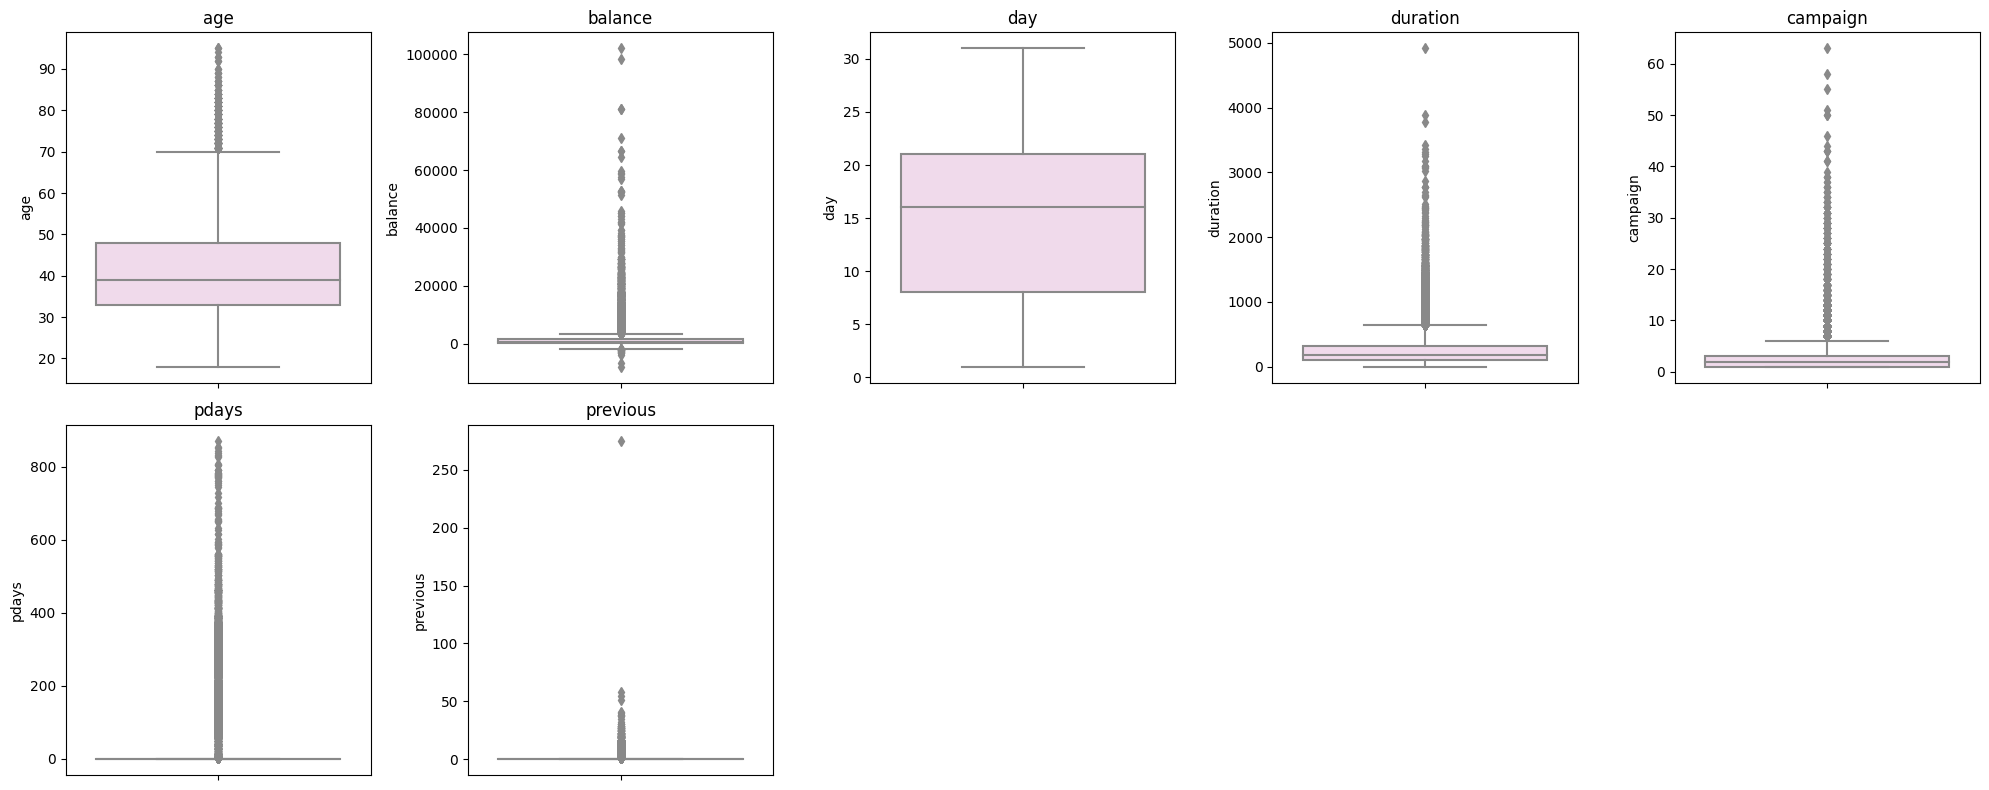

In [9]:
# Check Outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n = len(numeric_cols)
ncols = 5
nrows = n // ncols + (1 if n % ncols else 0)

plt.figure(figsize=(20, nrows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(y=df[col],color='#F4D6ED')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [10]:
df['balance'].sort_values(ascending=False)
# Reasonable outliers, no deletion.

39989    102127
26227     98417
43393     81204
42558     81204
41693     71188
          ...  
1896      -3313
7413      -3372
38736     -4057
15682     -6847
12909     -8019
Name: balance, Length: 45211, dtype: int64

In [11]:
df['duration'].sort_values(ascending=False)
# Due to duration in seconds, reasonable outliers, no deletion.

24148    4918
9947     3881
44602    3785
19639    3422
2386     3366
         ... 
31740       1
44758       1
36425       0
22937       0
6424        0
Name: duration, Length: 45211, dtype: int64

In [12]:
df['campaign'].sort_values(ascending=False)
# Reasonable outliers, no deletion.

4330     63
11914    58
5073     55
4299     51
18713    50
         ..
25060     1
25059     1
25058     1
25057     1
22605     1
Name: campaign, Length: 45211, dtype: int64

In [13]:
df['previous'].sort_values(ascending=False).head()

29182    275
38326     58
44089     55
28886     51
44822     41
Name: previous, dtype: int64

In [14]:
df=df.drop(index=29182)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  duration   45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
 16  y          45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


#### <font color="#fccfed">***Categorical data cleaning***</font>

In [16]:
# Check abnormal rows in object category.
df.select_dtypes(include=['object']).nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [17]:
df['job'].value_counts()

job
blue-collar      9732
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [18]:
rows_to_drop = df[df['job'] == 'unknown'].index
df = df.drop(index = rows_to_drop)
# 288 rows containing unknown jobs are deleted.

In [19]:
df['marital'].value_counts()
# Seems good.

marital
married     27010
single      12722
divorced     5190
Name: count, dtype: int64

In [20]:
df['education'].value_counts()

education
secondary    23131
tertiary     13261
primary       6800
unknown       1730
Name: count, dtype: int64

In [21]:
job_modes = df.groupby('job')['education'].agg(lambda x: x.mode().iloc[0]).reset_index()

for index, row in job_modes.iterrows():
    job = row['job']
    mode_education = row['education']
    df.loc[df['job'] == job, 'education'] = mode_education

In [22]:
df['contact'].value_counts()

contact
cellular     29153
unknown      12909
telephone     2860
Name: count, dtype: int64

In [23]:
# Select rows where 'contact' is 'unknown'
condition = df['contact'] == 'unknown'
unknown_contact_rows = df[condition]

# Find the mode of 'contact' for rows with the same conditions
matching_rows = df[~condition].groupby(['age', 'job', 'marital', 'education', 'housing', 'default', 'loan'])['contact'].agg(lambda x: x.mode().iloc[0]).reset_index()

# Merge the mode data into the rows with unknown contact
merged_df = unknown_contact_rows.merge(matching_rows, on=['age', 'job', 'marital', 'education', 'housing', 'default', 'loan'], how='left')

# Reset the index
merged_df.set_index(unknown_contact_rows.index, inplace=True)

# Update the 'contact' column
df.loc[merged_df.index, 'contact'] = merged_df['contact_y']

In [24]:
df['contact'].value_counts()

contact
cellular     41437
telephone     2916
Name: count, dtype: int64

In [25]:
df['month'].value_counts()

month
may    13735
jul     6864
aug     6184
jun     5251
nov     3956
apr     2925
feb     2635
jan     1388
oct      727
sep      570
mar      474
dec      213
Name: count, dtype: int64

In [26]:
df['poutcome'].value_counts()

poutcome
unknown    36704
failure     4881
other       1837
success     1500
Name: count, dtype: int64

#### <font color="#fccfed">***Exploratory data analysis***</font>

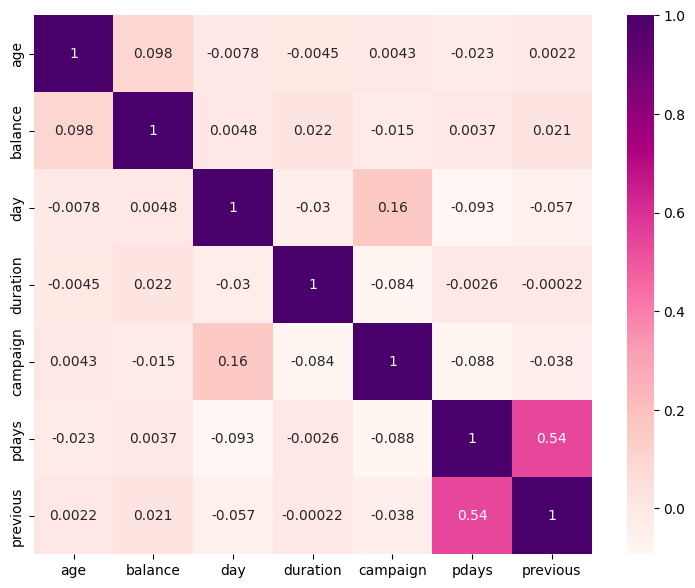

In [27]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu')
plt.show()

# No strong correlation between exploratory data.

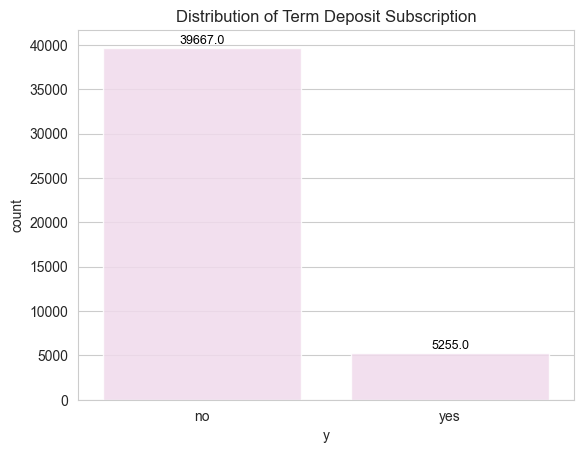

In [28]:
sns.set_style('whitegrid')
ax=sns.countplot(x='y', data=df, color='#F4D6ED', alpha=0.85)
plt.title('Distribution of Term Deposit Subscription')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

# Has a potential problem of imbalanced data.

Only 5255 clients has subscribed the term deposits, accounting for 11% of total number of clients. The data have a potential problem of imbalanced data.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44922 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44922 non-null  int64 
 1   job        44922 non-null  object
 2   marital    44922 non-null  object
 3   education  44922 non-null  object
 4   default    44922 non-null  object
 5   balance    44922 non-null  int64 
 6   housing    44922 non-null  object
 7   loan       44922 non-null  object
 8   contact    44353 non-null  object
 9   day        44922 non-null  int64 
 10  month      44922 non-null  object
 11  duration   44922 non-null  int64 
 12  campaign   44922 non-null  int64 
 13  pdays      44922 non-null  int64 
 14  previous   44922 non-null  int64 
 15  poutcome   44922 non-null  object
 16  y          44922 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.2+ MB


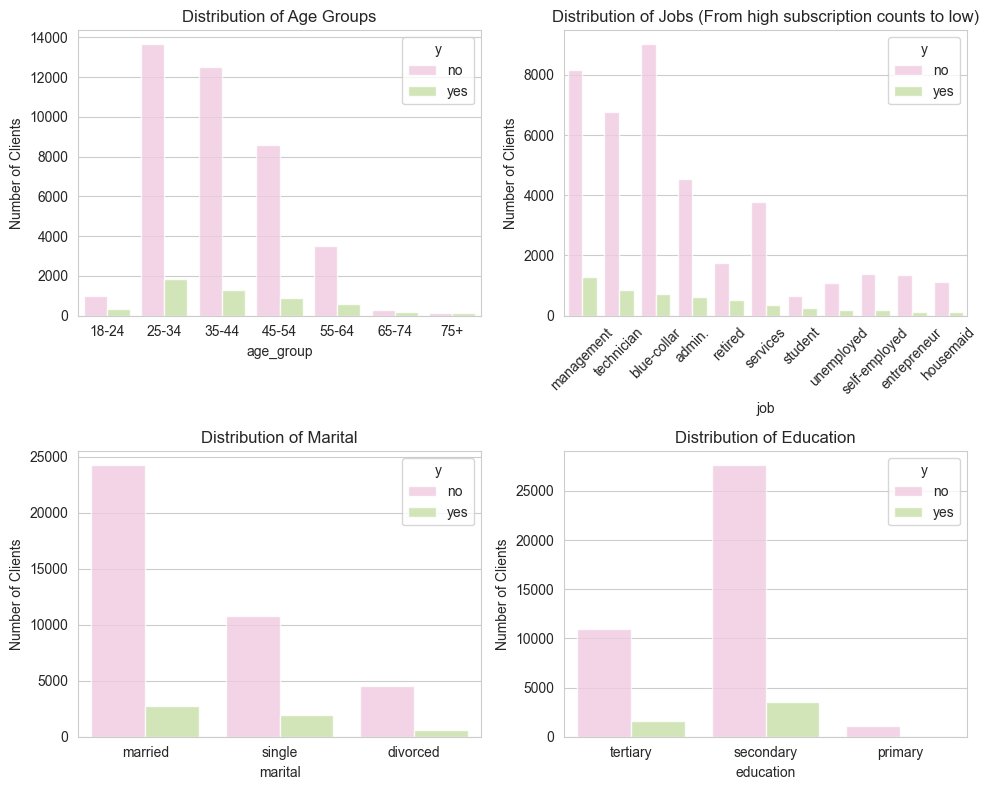

In [30]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Age Distribution
age_bins = [18, 25, 35, 45, 55, 65, 75, 95] 
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'] 
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
sns.countplot(x='age_group', data=df, ax=axes[0, 0], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[0, 0].set_title('Distribution of Age Groups')
axes[0, 0].set_ylabel('Number of Clients')

# Job Distribution
yes_counts = df[df['y'] == 'yes']['job'].value_counts().reset_index()
yes_counts.columns = ['job', 'yes_count']
yes_counts = yes_counts.sort_values(by='yes_count', ascending=False)
sns.countplot(x='job', data=df, ax=axes[0, 1], palette='PiYG', edgecolor='white', hue='y', alpha=0.8, order=yes_counts['job'])
axes[0, 1].set_title('Distribution of Jobs (From high subscription counts to low)')
axes[0, 1].set_ylabel('Number of Clients')
axes[0, 1].tick_params(axis='x', rotation=45)

# Marital Distribution
sns.countplot(x='marital', data=df, ax=axes[1, 0], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[1, 0].set_title('Distribution of Marital')
axes[1, 0].set_ylabel('Number of Clients')

# Education Distribution
sns.countplot(x='education', data=df, ax=axes[1, 1], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[1, 1].set_title('Distribution of Education')
axes[1, 1].set_ylabel('Number of Clients')

plt.tight_layout()
plt.show()


The graph clearly illustrates distinct trends in term deposit subscriptions. It's evident that clients within the 25-44 age bracket exhibit a higher propensity to subscribe. Additionally, individuals employed in managerial, technical, and blue-collar occupations also demonstrate a greater inclination towards term deposits. Moreover, both married and single clients exhibit a tendency to subscribe. Furthermore, a significant number of clients with secondary education backgrounds display a willingness to subscribe to term deposits.

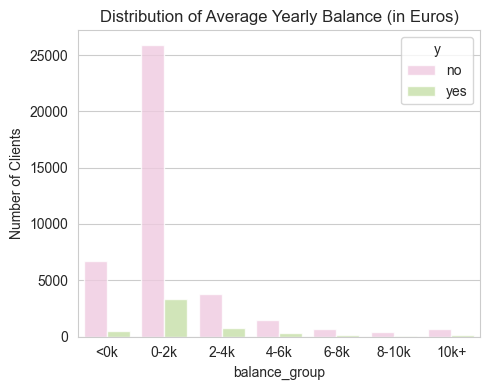

In [31]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(figsize=(5, 4))

# Balance Distribution
balance_bins = [-8019, 0, 2000, 4000, 6000, 8000, 10000, 102127] 
balance_labels = ['<0k', '0-2k', '2-4k','4-6k', '6-8k', '8-10k', '10k+'] 
df['balance_group'] = pd.cut(df['balance'], bins=balance_bins, labels=balance_labels)
sns.countplot(x='balance_group', data=df, palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes.set_title('Distribution of Average Yearly Balance (in Euros)')
axes.set_ylabel('Number of Clients')

plt.tight_layout()
plt.show()

The graph illustrates the distribution of client balances and their propensity to subscribe to term deposits. Clients with balances ranging from 0 to 4000 exhibit a greater inclination to opt for term deposit subscriptions.

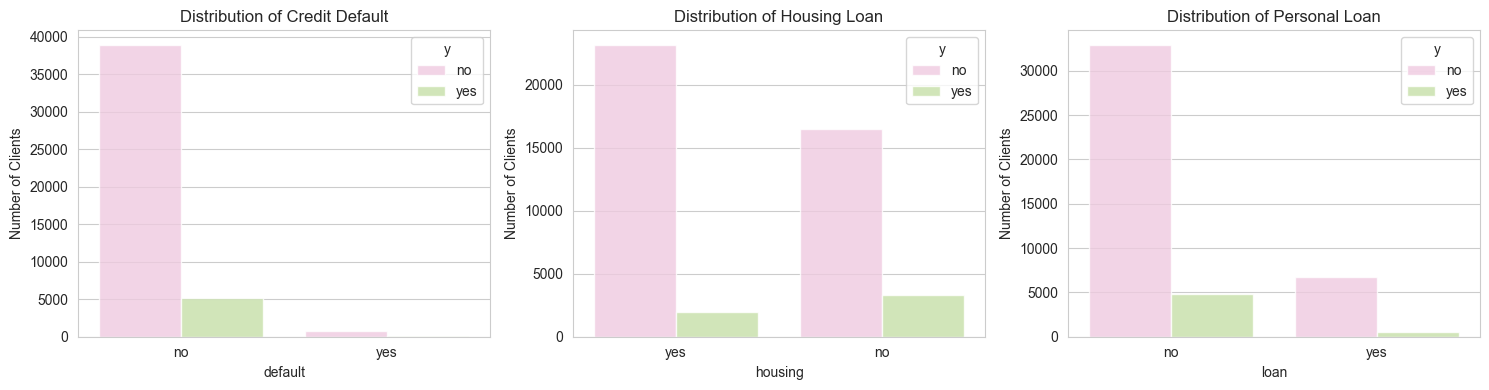

In [32]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Default Distribution
sns.countplot(x='default', data=df, ax=axes[0], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[0].set_title('Distribution of Credit Default')
axes[0].set_ylabel('Number of Clients')

# Housing Distribution
sns.countplot(x='housing', data=df, ax=axes[1], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[1].set_title('Distribution of Housing Loan')
axes[1].set_ylabel('Number of Clients')

# Loan Distribution
sns.countplot(x='loan', data=df, ax=axes[2], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[2].set_title('Distribution of Personal Loan')
axes[2].set_ylabel('Number of Clients')

plt.tight_layout()
plt.show()

The graph clearly illustrates that clients without a history of credit defaults are more inclined to subscribe to term deposits. Additionally, clients who do not have housing loans show a higher propensity to subscribe to term deposits. On the other hand, clients with personal loans are more likely to express interest in term deposits.

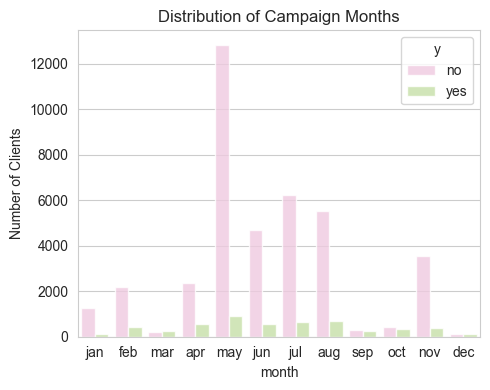

In [33]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(figsize=(5, 4))

# Months Distribution
orders=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.countplot(x='month', data=df, palette='PiYG', edgecolor='white', hue='y', alpha=0.8, order=orders)
axes.set_title('Distribution of Campaign Months')
axes.set_ylabel('Number of Clients')

plt.tight_layout()
plt.show()

The graph indicates that clients are more willing to subscribe term deposits in late Spring and Summer (April to August).

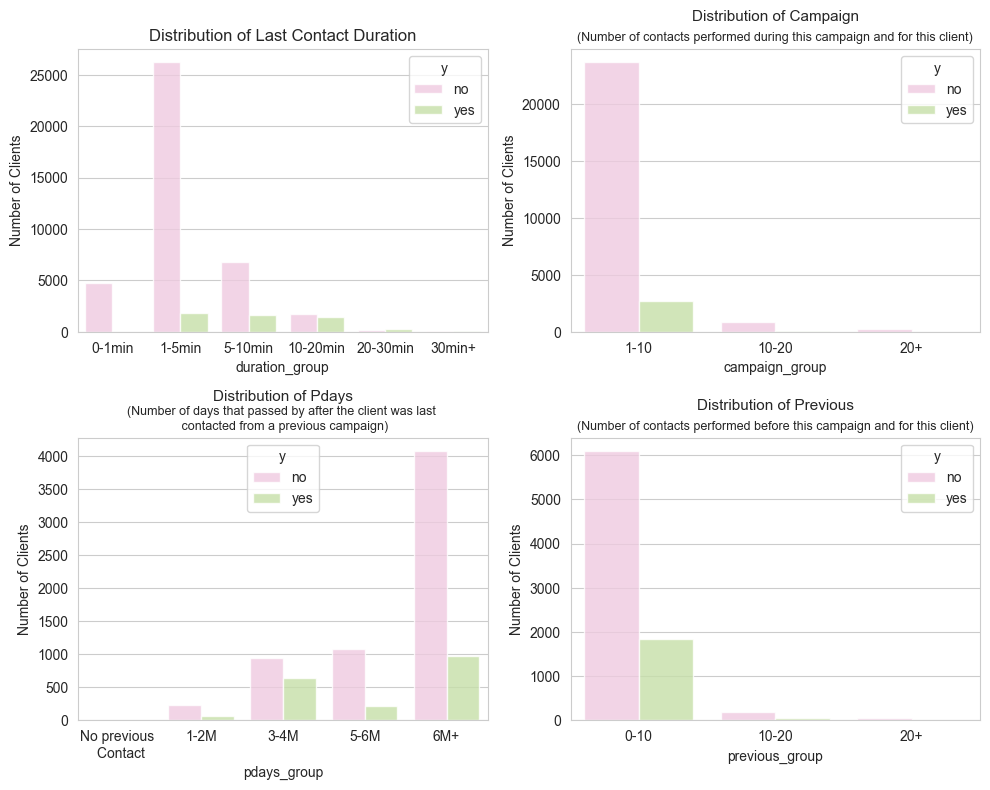

In [34]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Duration Distribution
duration_bins = [0, 60, 300, 600, 1200, 1800, 4918] 
duration_labels = ['0-1min', '1-5min', '5-10min', '10-20min', '20-30min', '30min+'] 
df['duration_group'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels)
sns.countplot(x='duration_group', data=df, ax=axes[0, 0], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[0, 0].set_title('Distribution of Last Contact Duration')
axes[0, 0].set_ylabel('Number of Clients')

# Campaign Distribution
campaign_bins = [1, 10, 20, 63] 
campaign_labels = ['1-10', '10-20', '20+'] 
df['campaign_group'] = pd.cut(df['campaign'], bins=campaign_bins, labels=campaign_labels)
sns.countplot(x='campaign_group', data=df, ax=axes[0, 1], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[0, 1].set_title('(Number of contacts performed during this campaign and for this client)',fontsize=9)
axes[0, 1].set_ylabel('Number of Clients')
axes[0, 1].text(0.5, 1.1, 'Distribution of Campaign', transform=axes[0, 1].transAxes,
            fontsize=11, ha='center')

# Pdays Distribution
pdays_bins = [-1, 0, 60, 120, 180, 871] 
pdays_labels = ['No previous \n Contact', '1-2M', '3-4M', '5-6M', '6M+'] 
df['pdays_group'] = pd.cut(df['pdays'], bins=pdays_bins, labels=pdays_labels)
sns.countplot(x='pdays_group', data=df, ax=axes[1, 0], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[1, 0].set_title('(Number of days that passed by after the client was last \n contacted from a previous campaign)',fontsize=9)
axes[1, 0].set_ylabel('Number of Clients')
axes[1, 0].text(0.5, 1.13, 'Distribution of Pdays', transform=axes[1, 0].transAxes,
            fontsize=11, ha='center')

# Previous Distribution
previous_bins = [0, 10, 20, 58] 
previous_labels = ['0-10', '10-20', '20+'] 
df['previous_group'] = pd.cut(df['previous'], bins=previous_bins, labels=previous_labels)
sns.countplot(x='previous_group', data=df, ax=axes[1, 1], palette='PiYG', edgecolor='white', hue='y', alpha=0.8)
axes[1, 1].set_title('(Number of contacts performed before this campaign and for this client)',fontsize=9)
axes[1, 1].set_ylabel('Number of Clients')
axes[1, 1].text(0.5, 1.1, 'Distribution of Previous', transform=axes[1, 1].transAxes,
            fontsize=11, ha='center')

plt.tight_layout()
plt.show()

The graphs indicate that clients are more likely to subscribe to term deposits when:

1. The last contact duration is 1-10 minutes.
2. The number of contacts in the current campaign is less than 10.
3. There has been a 3-4 month or longer gap since the previous campaign contact.
4. The number of contacts before the current campaign is less than 10.

In [35]:
df['y'].value_counts()

y
no     39667
yes     5255
Name: count, dtype: int64

In [36]:
df['y'] = df['y'].replace({'no':0,'yes':1})

#### <font color="#fccfed">***Feature engineering***</font>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44922 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             44922 non-null  int64   
 1   job             44922 non-null  object  
 2   marital         44922 non-null  object  
 3   education       44922 non-null  object  
 4   default         44922 non-null  object  
 5   balance         44922 non-null  int64   
 6   housing         44922 non-null  object  
 7   loan            44922 non-null  object  
 8   contact         44353 non-null  object  
 9   day             44922 non-null  int64   
 10  month           44922 non-null  object  
 11  duration        44922 non-null  int64   
 12  campaign        44922 non-null  int64   
 13  pdays           44922 non-null  int64   
 14  previous        44922 non-null  int64   
 15  poutcome        44922 non-null  object  
 16  y               44922 non-null  int64   
 17  age_group       4

In [38]:
cat_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome']
num_columns = ['age','balance','day','duration','campaign','pdays','previous']
target = 'y'

In [39]:
# Build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [41]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [42]:
x_train_transformed.shape

(35937, 49)

In [43]:
x_test_transformed.shape

(8985, 49)

In [44]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test = pd.DataFrame(x_test_transformed, columns=all_feat)

#### <font color="#fccfed">***Logistic regrassion & KNN modelling***</font>

In [45]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, recall_score

In [46]:
# Logistic Regression
log = LogisticRegression()
log.fit(X_train,y_train)
pred_log = log.predict(X_test)

accuracy_log = accuracy_score(y_test, pred_log)
precision_log = precision_score(y_test, pred_log)
recall_log = recall_score(y_test, pred_log)
f1_score_log = f1_score(y_test, pred_log)

print("Metrics for Logistic Regression Model:")
print(f"Accuracy: {accuracy_log:.2f}")
print(f"Precision: {precision_log:.2f}")
print(f"Recall: {recall_log:.2f}")
print(f"F1 Score: {f1_score_log:.2f}")

# Hyperparameter Tuning
log_param = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
}

log = LogisticRegression()

log_random_search = RandomizedSearchCV(
    log, log_param, n_iter=10, scoring='recall', cv=5, verbose=1, n_jobs=-1
)

log_random_search.fit(X_train, y_train)
best_log_params = log_random_search.best_params_

best_log_model = LogisticRegression(**best_log_params)
best_log_model.fit(X_train, y_train)
pred_log_best = best_log_model.predict(X_test)

accuracy_log_best = accuracy_score(y_test, pred_log_best)
precision_log_best = precision_score(y_test, pred_log_best)
recall_log_best = recall_score(y_test, pred_log_best)
f1_score_log_best = f1_score(y_test, pred_log_best)

print("Metrics for Logistic Regression Model After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_log_best:.2f}")
print(f"Precision: {precision_log_best:.2f}")
print(f"Recall: {recall_log_best:.2f}")
print(f"F1 Score: {f1_score_log_best:.2f}")

Metrics for Logistic Regression Model:
Accuracy: 0.90
Precision: 0.68
Recall: 0.32
F1 Score: 0.44
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------

Metrics for Logistic Regression Model After Hyperparameter Tuning:
Accuracy: 0.90
Precision: 0.68
Recall: 0.32
F1 Score: 0.44


In [47]:
# KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, pred_knn)
precision_knn = precision_score(y_test, pred_knn)
recall_knn = recall_score(y_test, pred_knn)
f1_score_knn = f1_score(y_test, pred_knn)

print("KNN Models Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_score_knn:.2f}")

# Hyperparameter Tuning
knn_param = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

knn = KNeighborsClassifier()

knn_random_search = RandomizedSearchCV(
    knn, knn_param, n_iter=10, scoring='recall', cv=5, verbose=1, n_jobs=-1
)

knn_random_search.fit(X_train, y_train)
best_knn_params = knn_random_search.best_params_

best_knn_model = KNeighborsClassifier(**best_knn_params)
best_knn_model.fit(X_train, y_train)
pred_knn_best = best_knn_model.predict(X_test)

accuracy_knn_best = accuracy_score(y_test, pred_knn_best)
precision_knn_best = precision_score(y_test, pred_knn_best)
recall_knn_best = recall_score(y_test, pred_knn_best)
f1_score_knn_best = f1_score(y_test, pred_knn_best)

print("KNN Model Metrics After Tuning:")
print(f"Accuracy: {accuracy_knn_best:.2f}")
print(f"Precision: {precision_knn_best:.2f}")
print(f"Recall: {recall_knn_best:.2f}")
print(f"F1 Score: {f1_score_knn_best:.2f}")

KNN Models Metrics:
Accuracy: 0.89
Precision: 0.59
Recall: 0.32
F1 Score: 0.42
Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNN Model Metrics After Tuning:
Accuracy: 0.89
Precision: 0.56
Recall: 0.34
F1 Score: 0.42


In [48]:
yhat_log = best_log_model.predict_proba(X_test)
yhat_knn = best_knn_model.predict_proba(X_test)

In [49]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, yhat_log[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, yhat_knn[:,1])

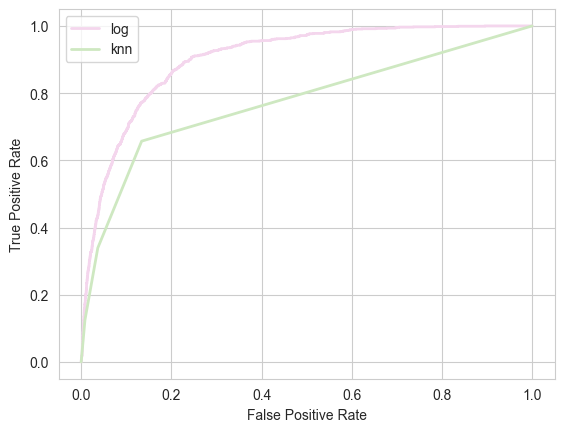

In [50]:
sns.set_style("whitegrid")
plt.plot(fpr_log,tpr_log, label='log', color='#F4D6ED', lw=2)
plt.plot(fpr_knn,tpr_knn, label='knn', color='#cee8c1', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

The Logistic Regression performs better than KNN Model for this problem.

In [51]:
accuracy_log_best = accuracy_score(y_test, pred_log_best)
precision_log_best = precision_score(y_test, pred_log_best)
recall_log_best = recall_score(y_test, pred_log_best)
f1_log_best = f1_score(y_test, pred_log_best)

accuracy_knn_best = accuracy_score(y_test, pred_knn_best)
precision_knn_best = precision_score(y_test, pred_knn_best)
recall_knn_best = recall_score(y_test, pred_knn_best)
f1_knn_best = f1_score(y_test, pred_knn_best)

print("Logistic Regression after Tuning:")
print(f"Accuracy: {accuracy_log_best:.2f}")
print(f"Precision: {precision_log_best:.2f}")
print(f"Recall: {recall_log_best:.2f}")
print(f"F1 score: {f1_log_best:.2f}")

print()

print("K-Nearest Neighbors after Tuning:")
print(f"Accuracy: {accuracy_knn_best:.2f}")
print(f"Precision: {precision_knn_best:.2f}")
print(f"Recall: {recall_knn_best:.2f}")
print(f"F1 score: {f1_knn_best:.2f}")

Logistic Regression after Tuning:
Accuracy: 0.90
Precision: 0.68
Recall: 0.32
F1 score: 0.44

K-Nearest Neighbors after Tuning:
Accuracy: 0.89
Precision: 0.56
Recall: 0.34
F1 score: 0.42


Both model performs well in accuracy score, medium in precision, and low in recall and f1, this may be caused by the imbalanced dataset. In this case, the term deposit subscription problem should focuses on capturing all positive cases, which means to identify as many potential subscribers as possible and be willing to invest in marketing to a broader audience. Therefore, it is better to evaluate the recall score over other scores for this analysis. 

The KNN model has a slightly higher recall score of 0.34 compared to that of KNN (0.32). However, both models have low recall rates and F1 scores, indicating a low ability of capturing potential clients. Therefore, neither of the two models is the most suitable for this dataset.

#### <font color="#fccfed">***Ensemble Modelling***</font>

In [52]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, pred_rf)
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_score_rf = f1_score(y_test, pred_rf)

print("Random Forest Model Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_score_rf:.2f}")


# Hyperparameter Tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='recall', random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)
pred_rf_best = best_rf.predict(X_test)


accuracy_rf_best = accuracy_score(y_test, pred_rf_best)
precision_rf_best = precision_score(y_test, pred_rf_best)
recall_rf_best = recall_score(y_test, pred_rf_best)
f1_score_rf_best = f1_score(y_test, pred_rf_best)

print("Random Forest Model Metrics After Tuning:")
print(f"Accuracy: {accuracy_rf_best:.2f}")
print(f"Precision: {precision_rf_best:.2f}")
print(f"Recall: {recall_rf_best:.2f}")
print(f"F1 Score: {f1_score_rf_best:.2f}")



Random Forest Model Metrics:
Accuracy: 0.90
Precision: 0.65
Recall: 0.38
F1 Score: 0.48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

Random Forest Model Metrics After Tuning:
Accuracy: 0.90
Precision: 0.67
Recall: 0.38
F1 Score: 0.48


In [54]:
# AdaBoost model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
pred_ada = ada.predict(X_test)

accuracy_ada = accuracy_score(y_test, pred_ada)
precision_ada = precision_score(y_test, pred_ada)
recall_ada = recall_score(y_test, pred_ada)
f1_score_ada = f1_score(y_test, pred_ada)

print("AdaBoost Model Metrics:")
print(f"Accuracy: {accuracy_ada:.2f}")
print(f"Precision: {precision_ada:.2f}")
print(f"Recall: {recall_ada:.2f}")
print(f"F1 Score: {f1_score_ada:.2f}")

# Hyperparameter Tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

random_search = RandomizedSearchCV(
    ada, param_distributions=param_dist, n_iter=10, cv=5, scoring='recall', random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)
best_ada= random_search.best_estimator_
best_ada.fit(X_train, y_train)

pred_ada_best = best_ada.predict(X_test)

accuracy_ada_best = accuracy_score(y_test, pred_ada_best)
precision_ada_best = precision_score(y_test, pred_ada_best)
recall_ada_best = recall_score(y_test, pred_ada_best)
f1_score_ada_best = f1_score(y_test, pred_ada_best)

print("AdaBoost Model Metrics After Tuning:")
print(f"Accuracy: {accuracy_ada_best:.2f}")
print(f"Precision: {precision_ada_best:.2f}")
print(f"Recall: {recall_ada_best:.2f}")
print(f"F1 Score: {f1_score_ada_best:.2f}")


AdaBoost Model Metrics:
Accuracy: 0.90
Precision: 0.63
Recall: 0.36
F1 Score: 0.46


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

AdaBoost Model Metrics After Tuning:
Accuracy: 0.90
Precision: 0.64
Recall: 0.45
F1 Score: 0.53


In [55]:
# Bagging Classifier model with Decision Tree base estimator
base_estimator = DecisionTreeClassifier(random_state=42)
bag= BaggingClassifier(base_estimator=base_estimator, random_state=42)
bag.fit(X_train, y_train)
pred_bag = bag.predict(X_test)

accuracy_bag = accuracy_score(y_test, pred_bag)
precision_bag = precision_score(y_test, pred_bag)
recall_bag = recall_score(y_test, pred_bag)
f1_score_bag = f1_score(y_test, pred_bag)

print("Bagging Model Metrics:")
print(f"Accuracy: {accuracy_bag:.2f}")
print(f"Precision: {precision_bag:.2f}")
print(f"Recall: {recall_bag:.2f}")
print(f"F1 Score: {f1_score_bag:.2f}")

# Hyperparameter Tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

random_search = RandomizedSearchCV(
    bag, param_distributions=param_dist, n_iter=10, cv=5, scoring='recall', random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)
best_bag = random_search.best_estimator_
best_bag.fit(X_train, y_train)
pred_bag_best = best_bag.predict(X_test)

accuracy_bag_best = accuracy_score(y_test, pred_bag_best)
precision_bag_best = precision_score(y_test, pred_bag_best)
recall_bag_best = recall_score(y_test, pred_bag_best)
f1_score_bag_best = f1_score(y_test, pred_bag_best)

print("Bagging Model Metrics After Tuning:")
print(f"Accuracy: {accuracy_bag_best:.2f}")
print(f"Precision: {precision_bag_best:.2f}")
print(f"Recall: {recall_bag_best:.2f}")
print(f"F1 Score: {f1_score_bag_best:.2f}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Model Metrics:
Accuracy: 0.90
Precision: 0.61
Recall: 0.39
F1 Score: 0.48


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

Bagging Model Metrics After Tuning:
Accuracy: 0.89
Precision: 0.55
Recall: 0.43
F1 Score: 0.48


In [56]:
# Voting Classifier
base_models = [
    ('svm', SVC(probability=True)),
    ('naive_bayes', GaussianNB()),
    ('logistic_regression', LogisticRegression())
]

# Hard Voting
hv = VotingClassifier(estimators=base_models, voting='hard')
hv.fit(X_train, y_train)
hv.fit(X_train, y_train)
pred_hv = hv.predict(X_test)

accuracy_hv = accuracy_score(y_test, pred_hv)
precision_hv = precision_score(y_test, pred_hv)
recall_hv = recall_score(y_test, pred_hv)
f1_score_hv = f1_score(y_test, pred_hv)

print("Hard Voting Model Metrics:")
print(f"Accuracy: {accuracy_hv:.2f}")
print(f"Precision: {precision_hv:.2f}")
print(f"Recall: {recall_hv:.2f}")
print(f"F1 Score: {f1_score_hv:.2f}")

# Soft Voting
sv= VotingClassifier(estimators=base_models, voting='soft')
sv.fit(X_train, y_train)
sv.fit(X_train, y_train)
pred_sv = sv.predict(X_test)

accuracy_sv = accuracy_score(y_test, pred_sv)
precision_sv = precision_score(y_test, pred_sv)
recall_sv = recall_score(y_test, pred_sv)
f1_score_sv = f1_score(y_test, pred_sv)

print("Soft Voting Metrics:")
print(f"Accuracy: {accuracy_sv:.2f}")
print(f"Precision: {precision_sv:.2f}")
print(f"Recall: {recall_sv:.2f}")
print(f"F1 Score: {f1_score_sv:.2f}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Hard Voting Model Metrics:
Accuracy: 0.90
Precision: 0.65
Recall: 0.34
F1 Score: 0.45


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Soft Voting Metrics:
Accuracy: 0.90
Precision: 0.60
Recall: 0.39
F1 Score: 0.48


In [61]:
metrics_list_all = []

def add_metrics(model_name, accuracy, precision, recall, f1_score):
    metrics_dict = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
    }
    metrics_list_all.append(metrics_dict)

add_metrics('KNN', accuracy_knn_best, precision_knn_best, recall_knn_best, f1_score_knn_best)
add_metrics('Logistic Regression', accuracy_log_best, precision_log_best, recall_log_best, f1_score_log_best)
add_metrics('Random Forest', accuracy_rf_best, precision_rf_best, recall_rf_best, f1_score_ada_best)
add_metrics('AdaBoost', accuracy_ada_best, precision_ada_best, recall_ada_best, log_f1)
add_metrics('Bagging', accuracy_bag_best, precision_bag_best, recall_bag_best, f1_score_bag_best)
add_metrics('Hard Voting', accuracy_hv, precision_hv, recall_hv, f1_score_hv)
add_metrics('Soft Voting', accuracy_sv, precision_sv, recall_sv, f1_score_sv)

metrics_df_all = pd.DataFrame(metrics_list_all)

metrics_df_all

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.888258,0.557078,0.339203,0.421659
1,Logistic Regression,0.900056,0.677104,0.320667,0.435220
2,Random Forest,0.903172,0.673877,0.375348,0.526258
3,AdaBoost,0.903617,0.642190,0.445783,0.436204
4,Bagging,0.889594,0.551601,0.430955,0.483871
5,Hard Voting,0.899165,0.654741,0.339203,0.446886
6,Soft Voting,0.895492,0.598592,0.393883,0.475126


Recall scores and F1 scores are more significant than precision in this scenario because our goal is to target potential clients, requiring a broader capture of clients.

- ***KNN*** has a relatively high accuracy but low recall, indicating that it predicts "yes" subscriptions with moderate accuracy but may miss a significant number of potential subscribers. ***Logistic Regression*** has good accuracy and precision, but its recall is relatively low. This means it's better at predicting "yes" subscriptions correctly but misses some potential subscribers. 

- ***Random Forest*** performs well with a good balance between accuracy, precision, and recall. It captures more potential subscribers while maintaining high accuracy and precision. ***AdaBoost*** achieves a relatively high recall, making it effective at capturing more potential subscribers. However, its precision is slightly lower compared to Random Forest. ***Bagging*** shows a balanced performance with decent recall and precision. It captures potential subscribers effectively while maintaining reasonable accuracy.


- ***Hard Voting*** combines multiple models, resulting in higher precision compared to individual models like KNN and Logistic Regression. However, it still has room for improvement in recall. ***Soft Voting*** offers a balance between precision and recall, similar to Bagging. It captures potential subscribers effectively while maintaining a reasonable level of accuracy.

- Overall, the trade-offs between precision and recall are determined by specific business objectives. If capturing more potential subscribers is a top priority, Random Forest and AdaBoost appear to be good choices due to their higher recall values. However, if a balance between precision and recall is required, Random Forest stands out as a well-rounded option with high accuracy.

In [64]:
# Get feature importance for Adaboost
feature_importance = best_ada.feature_importances_

feature_names = list(X_train.columns) 

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

for feature, importance in sorted_feature_importance.items():
    print(f"{feature}: {importance}")

poutcome_failure: 0.2618051897449201
month_oct: 0.11565146702930029
poutcome_success: 0.09574348480774011
month_sep: 0.0786709749546506
month_nov: 0.06462339471974583
contact_telephone: 0.037666107862072334
poutcome_unknown: 0.03403951326122105
poutcome_other: 0.03209944744297138
month_mar: 0.023558920092434574
housing_no: 0.02334213846341755
month_aug: 0.023091453339757304
housing_yes: 0.020233178488658413
marital_single: 0.019433879327611266
month_feb: 0.01793528037155406
contact_cellular: 0.01690575535116367
month_dec: 0.016743043142254742
loan_yes: 0.016688367048016003
contact_nan: 0.013451963879063169
month_apr: 0.008909643311176002
day: 0.0082404595119921
month_jan: 0.00773913724427061
pdays: 0.007716966878244793
marital_married: 0.0072953995441638305
education_secondary: 0.0047922239352806645
job_unemployed: 0.004744406908623051
balance: 0.004411004073646525
job_services: 0.0040218041700307815
job_retired: 0.0033429142383066533
default_yes: 0.0032130150433784714
month_jun: 0.003

**Analysis:**

1. Previous campaign outcome would be a significant predictor of whether the client will subscribe to a term deposit.
- The outcome of the previous marketing campaign where the client had a failure (0.2618) mainly influences whether the client will subscribe to a term deposit.
- A successful outcome (0.0957) from the previous marketing campaign is also an important predictor, but it has lower importance compared to poutcome_failure.
- Other (0.0321) and unknown (0.0340) outcomes from the previous campaign have some importance but are not as influential as poutcome_failure or poutcome_success.

2. Last contact month of the year is also significant in determining whether the client will subscribe to a term deposit.
- Last contact in November (0.0646), October (0.1157), September (0.0787), and March (0.0236) have relatively high importance scores, indicating that the month of the last contact influences the subscription decision.
- Some months (e.g., November, October) have a positive impact, while others (e.g., March, September) have a negative impact.
- Last contact in August (0.023) and February (0.0179) has less influence than the mentioned months.
- Last contact in January (0.0077) , April (0.0089) and others have lower importance but still contribute to the model's predictions to some extent.

3. Contact method of telephone (0.0376) or cellular (0.0169) also have an significant influence in determining whether the client will subscribe to a term deposit.

4. The presence or absence of a housing loan also plays a role in predicting term deposit subscription.
- No housing loan (0.023) and having a housing loan (0.020) both have some importance, suggesting that the client's housing loan status is relevant.

#### <font color="#fccfed">***Interpretation and Justification***</font>

##### 1. Why did the ensemble models perform the way they did?

- Firstly, ensemble models combine the predictions of multiple base models, which can reduce overfitting, enhance model generalization, and capture complex patterns in the data.

- Secondly, they are robust to imbalanced datasets, which is important in scenarios like term deposit subscription prediction, where one class (not subscribed) is significantly larger than the other (not subscribed). 

- Additionally, ensemble models such as Random Forest and AdaBoost provide feature importance scores, allowing us to identify which features are crucial for making predictions. This can provide valuable insights into the factors influencing subscription decisions.

- Morever, the voting classifier combines multiple base models, potentially leveraging the strengths of different algorithms. This can lead to improved performance by reducing bias and variance.

##### 2. If you had to pick one model to implement in business process, which would it be and why? What decision criteria did you use to arrive at this conclusion?

I would choose ***AdaBoost***. 

- In terms of the term deposit subscription scenario, it's essential to consider maximize the potential clients with less market resource waste. Therefore, a high recall rate and then a high F1 score may be a good metric combination to check. AdaBoost has the highest Recall Score of 0.4457 and a high F1 Score of 0.4362. It also has a relatively high Accuracy Score of 0.9036 and Precision Score of 0.6422. This indicates that AdaBoost's balanced precision and recall are well-suited for a term deposit subscription campaign. It avoids the risk of missing potential subscribers while also minimizing the chances of wasting marketing resources on unlikely subscribers. Notably, its recall is significantly better compared to other models like Logistic Regression.

- Additionally, it is computationally efficient and can be trained and deployed with reasonable computational resources.

- Moreover, it is a robust ensemble method that combines multiple weak decision trees to create a strong learner, which helps to handle complex and non-linear patterns in the data.

- Furthermore, AdaBoost is good at handling imbalanced datasets. In this scenario where there is a significant class imbalance between subscribed and non-subscribed clients. It focuses on misclassified samples, which can be particularly useful for improving the prediction of the minority class (subscribed clients). 

- However, AdaBoost is not as interpretable as simple linear classification but it can be partially interpretable by analyzing feature importance, which can provide insights into which client characteristics are driving the subscription predictions.